# Analyzing customer messages

This notebook demonstrates Python code for analyzing customer messages using Watson Natural Language Understanding - with default models.

- Step 1: Install required libraries
- Step 2: Look up Natural Language Understanding API key
- Step 3: Analyze a simple, test message
- Step 4: Download sample customer messages 
- Step 5: Analyze sample customer messages
- Step 6: Visualize results for customer messages
    - 6.1: Bar charts
    - 6.2: Word clouds

## Step 1: Install required libraries

- `watson_developer_cloud` for working with [Watson Natural Language Understanding API](https://cloud.ibm.com/apidocs/natural-language-understanding?code=python)
- `word_cloud` for generating a word cloud of results.  See: [word_cloud](https://github.com/amueller/word_cloud/blob/master/README.md)

In [ ]:
!pip install --upgrade "ibm-watson>=3.0.3"

In [ ]:
!pip install wordcloud

## Step 2: Look up Natural Language Understanding API key and URL

1. From the **Services** menu in Watson Studio, right-click "Watson Services" and then open the link in a new browser tab
2. In the new Watson services tab, from the **Action** menu beside the Natural Language Understanding instance, select "Manage in IBM Cloud"
3. In the service details page that opens, click **Service credentials**, then expand credentials to view them, and then copy the apikey and URL

In [ ]:
apikey = "" # <-- PASTE YOUR APIKEY HERE
url    = "" # <-- PASTE YOUR SERVICE URL HERE

## Step 3: Analyze a simple, test message

See:
- [Watson Natural Language Understanding demo app](https://natural-language-understanding-demo.ng.bluemix.net/)
- [Text anaytics features](https://cloud.ibm.com/apidocs/natural-language-understanding?code=python#text-analytics-features)

In [4]:
# Import some libraries and instantiate a natural language understanding object
#
import json
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_watson.natural_language_understanding_v1 import Features, ConceptsOptions, EmotionOptions, EntitiesOptions, KeywordsOptions, SemanticRolesOptions, SentimentOptions, CategoriesOptions, SyntaxOptions, SyntaxOptionsTokens
authenticator = IAMAuthenticator( apikey )
nlu = NaturalLanguageUnderstandingV1( version='2018-11-16', authenticator=authenticator )
nlu.set_service_url( url )

In [5]:
# Explore every NLU feature option using this test message
#
text = "My Bluemix account is in Dallas, but I'm in Europe.  My friend, Sam, says that's not supported."

In [6]:
nlu.analyze( text=text, features=Features( sentiment=SentimentOptions() ) ).get_result()

{'usage': {'text_units': 1, 'text_characters': 95, 'features': 1},
 'sentiment': {'document': {'score': -0.597281, 'label': 'negative'}},
 'language': 'en'}

In [49]:
nlu.analyze( text=text, features=Features( emotion=EmotionOptions() ) ).get_result()

{'usage': {'text_units': 1, 'text_characters': 95, 'features': 1},
 'language': 'en',
 'emotion': {'document': {'emotion': {'sadness': 0.572478,
    'joy': 0.140939,
    'fear': 0.064887,
    'disgust': 0.211409,
    'anger': 0.125592}}}}

In [47]:
nlu.analyze( text=text, features=Features( keywords=KeywordsOptions() ) ).get_result()

{'usage': {'text_units': 1, 'text_characters': 95, 'features': 1},
 'language': 'en',
 'keywords': [{'text': 'Bluemix account', 'relevance': 0.996155, 'count': 1},
  {'text': 'friend', 'relevance': 0.794804, 'count': 1},
  {'text': 'Sam', 'relevance': 0.675236, 'count': 1},
  {'text': 'Dallas', 'relevance': 0.625663, 'count': 1},
  {'text': 'Europe', 'relevance': 0.598748, 'count': 1}]}

In [48]:
nlu.analyze( text=text, features=Features( entities=EntitiesOptions() ) ).get_result()

{'usage': {'text_units': 1, 'text_characters': 95, 'features': 1},
 'language': 'en',
 'entities': [{'type': 'Person',
   'text': 'Sam',
   'relevance': 0.900491,
   'count': 1},
  {'type': 'Location',
   'text': 'Dallas',
   'relevance': 0.870252,
   'disambiguation': {'subtype': ['City']},
   'count': 1},
  {'type': 'Location',
   'text': 'Europe',
   'relevance': 0.81586,
   'disambiguation': {'subtype': ['MusicalGroup',
     'BroadcastArtist',
     'FilmMusicContributor',
     'Lyricist',
     'MusicalArtist',
     'RecordProducer',
     'Continent'],
    'name': 'Europe',
    'dbpedia_resource': 'http://dbpedia.org/resource/Europe'},
   'count': 1}]}

In [50]:
nlu.analyze( text=text, features=Features( categories=CategoriesOptions() ) ).get_result()

{'usage': {'text_units': 1, 'text_characters': 95, 'features': 1},
 'language': 'en',
 'categories': [{'score': 0.60631, 'label': '/travel/traveling with kids'},
  {'score': 0.600839, 'label': '/society/dating'},
  {'score': 0.599413, 'label': '/art and entertainment/shows and events'}]}

In [51]:
nlu.analyze( text=text, features=Features( concepts=ConceptsOptions() ) ).get_result()

{'usage': {'text_units': 1, 'text_characters': 95, 'features': 1},
 'language': 'en',
 'concepts': [{'text': 'United States',
   'relevance': 0.916595,
   'dbpedia_resource': 'http://dbpedia.org/resource/United_States'}]}

In [55]:
nlu.analyze( text=text, features=Features( syntax=SyntaxOptions( tokens=SyntaxOptionsTokens( part_of_speech=True ) ) ) ).get_result()

{'usage': {'text_units': 1, 'text_characters': 95, 'features': 0},
 'syntax': {'tokens': [{'text': 'My',
    'part_of_speech': 'PRON',
    'location': [0, 2]},
   {'text': 'Bluemix', 'part_of_speech': 'NOUN', 'location': [3, 10]},
   {'text': 'account', 'part_of_speech': 'NOUN', 'location': [11, 18]},
   {'text': 'is', 'part_of_speech': 'AUX', 'location': [19, 21]},
   {'text': 'in', 'part_of_speech': 'ADP', 'location': [22, 24]},
   {'text': 'Dallas', 'part_of_speech': 'NOUN', 'location': [25, 31]},
   {'text': ',', 'part_of_speech': 'PUNCT', 'location': [31, 32]},
   {'text': 'but', 'part_of_speech': 'CCONJ', 'location': [33, 36]},
   {'text': 'I', 'part_of_speech': 'PRON', 'location': [37, 38]},
   {'text': "'m", 'part_of_speech': 'AUX', 'location': [38, 40]},
   {'text': 'in', 'part_of_speech': 'ADP', 'location': [41, 43]},
   {'text': 'Europe', 'part_of_speech': 'PROPN', 'location': [44, 50]},
   {'text': '.', 'part_of_speech': 'PUNCT', 'location': [50, 51]},
   {'text': 'My', 'pa

In [58]:
nlu.analyze( text=text, features=Features( semantic_roles=SemanticRolesOptions() ) ).get_result()

{'usage': {'text_units': 1, 'text_characters': 95, 'features': 1},
 'semantic_roles': [{'subject': {'text': 'My Bluemix account'},
   'sentence': "My Bluemix account is in Dallas, but I'm in Europe.",
   'object': {'text': 'in Dallas'},
   'action': {'verb': {'text': 'be', 'tense': 'present'},
    'text': 'is',
    'normalized': 'be'}},
  {'subject': {'text': 'I'},
   'sentence': "My Bluemix account is in Dallas, but I'm in Europe.",
   'action': {'verb': {'text': 'be', 'tense': 'present'},
    'text': 'am',
    'normalized': 'be'}},
  {'subject': {'text': 'My friend, Sam,'},
   'sentence': " My friend, Sam, says that's not supported.",
   'object': {'text': "that's not supported"},
   'action': {'verb': {'text': 'say', 'tense': 'present'},
    'text': 'says',
    'normalized': 'say'}}],
 'language': 'en'}

## Step 4: Import sample customer messages

This sample data set is from the Watson Studio Community: [Customer messages](https://dataplatform.cloud.ibm.com/exchange/public/entry/view/015ddef6a868441188268a123404f744)

**Note:** We are importing the data into a Pandas DataFrame by reading directly from the URL.  Another option would be to add this data set to the Watson Studio Project as an Asset, and then import the data here from the data panel.  Because we're not using this data set for anything else in this workshop, reading the data from the URL saves a few steps.

In [7]:
# Import the data into a DataFrame by reading from the URL
#
import pandas as pd
import io
import requests
url = "https://api.dataplatform.cloud.ibm.com/v2/gallery-assets/entries/015ddef6a868441188268a123404f744/data?accessKey=1e878a1edda3c1c8b3f9defb83e5c84b"
csv_contents = io.StringIO( requests.get( url ).content.decode( "utf-8" ) )
all_messages = pd.read_csv( csv_contents, header=None )
all_messages.head()

,0,1
0,excuse me,hi
1,Good evening,hi
2,Good morning,hi
3,good morning,hi
4,Good morning can you help me upload a shapefile?,question


In [11]:
# For analysis purposes, we want just the questions and problems, not the short, social messages labeled as "hi".
# And we want just the text of those questions and problems, not the labels column.
#
questions_problems_only = all_messages[all_messages.iloc[:,1] != "hi" ].reset_index(drop=True)
questions_problems_text = list( questions_problems_only.iloc[:,0] )
questions_problems_text[0:6]

['Good morning can you help me upload a shapefile?',
 'Good night where to place my file to import it into notebook?',
 'hai how can i do analyze with csv file is there any tutorial on it',
 'Having issues setup WML service',
 'hello - Im trying to edit a notebook and the circie just keeps spinning. any idea to get around this?',
 'hello how can i download a csv file from my notebook?']

## Step 5: Analyze customer messages

In [12]:
# What you get when you extract keywords and sematic roles at the same time
#
nlu.analyze( text=questions_problems_text[0], features=Features( keywords=KeywordsOptions(), semantic_roles=SemanticRolesOptions() ) ).get_result()

{'usage': {'text_units': 1, 'text_characters': 48, 'features': 2},
 'semantic_roles': [{'subject': {'text': 'you'},
   'sentence': 'Good morning can you help me upload a shapefile?',
   'object': {'text': 'me upload a shapefile'},
   'action': {'verb': {'text': 'help', 'tense': 'future'},
    'text': 'help',
    'normalized': 'help'}}],
 'language': 'en',
 'keywords': [{'text': 'Good morning', 'relevance': 0.999999, 'count': 1},
  {'text': 'shapefile', 'relevance': 0.00131, 'count': 1}]}

In [13]:
# Loop through all sample customer questions and problems, extracting keywords and sematic roles
#
results_list = []
for message in questions_problems_text:
    result = nlu.analyze( text=message, features=Features( keywords=KeywordsOptions(), semantic_roles=SemanticRolesOptions() ) ).get_result()
    keywords = []
    for keyword in result["keywords"]:
        keywords.append( keyword["text"] )
    subject = ""
    action  = ""
    obj     = ""
    if( "semantic_roles" in result ):
        if( len( result["semantic_roles"] ) > 0 ):
            if( "subject" in result["semantic_roles"][0] ):
                subject = result["semantic_roles"][0]["subject"]["text"]
            if( "action" in result["semantic_roles"][0] ):
                action  = result["semantic_roles"][0]["action"]["normalized"]
            if( "object" in result["semantic_roles"][0] ):
                obj = result["semantic_roles"][0]["object"]["text"]
    results_list.append( { "header"   : "-------------------------------------------------------------",
                           "message"  : message,
                           "keywords" : keywords,
                           "subject"  : subject,
                           "action"   : action,
                           "object"   : obj,
                           "spacer"   : "" } )

In [14]:
results_list

[{'header': '-------------------------------------------------------------',
  'message': 'Good morning can you help me upload a shapefile?',
  'keywords': ['Good morning', 'shapefile'],
  'subject': 'you',
  'action': 'help',
  'object': 'me upload a shapefile',
  'spacer': ''},
 {'header': '-------------------------------------------------------------',
  'message': 'Good night where to place my file to import it into notebook?',
  'keywords': ['Good night', 'file', 'notebook'],
  'subject': 'my file',
  'action': 'to place',
  'object': 'to import it into notebook',
  'spacer': ''},
 {'header': '-------------------------------------------------------------',
  'message': 'hai how can i do analyze with csv file is there any tutorial on it',
  'keywords': ['csv file', 'hai', 'tutorial'],
  'subject': 'i',
  'action': 'do',
  'object': 'analyze',
  'spacer': ''},
 {'header': '-------------------------------------------------------------',
  'message': 'Having issues setup WML service',

## Step 6: Visualize results for customer messages

### 6.1 Bar charts showing common words
Count the important words, and then plot bar charts to show the most common words.

In [18]:
# Define some helper functions for plotting the word counts bar charts
#
import random
from matplotlib import colors as mcolors
import numpy as np
import matplotlib.pyplot as plt

def random_colours( num ):
    rand_indexes = random.sample(range(0, len( mcolors.CSS4_COLORS.keys() ) - 1 ), num )
    colour_list = [ list( mcolors.CSS4_COLORS.keys() )[i] for i in rand_indexes ]
    return colour_list

def plot_words( title, ordered_words ):
    values    = ordered_words.values()
    labels    = list( ordered_words.keys() )
    num_bars  = len( labels )
    positions = np.arange( num_bars )
    colours   = random_colours( num_bars )
    
    fig, axs = plt.subplots( 1, 1, figsize=( 20, 6 ) )
    axs.bar( positions, values, color=colours, edgecolor="black" )
    plt.xticks( positions, labels ) 
    plt.tick_params( axis='both', which='major', labelsize=16)
    
    print( title )

In [19]:
# Count the "action" words
#
actions = {}
for entry in results_list:
    action = entry["action"]
    if( "" != action ):
        if( action not in actions ):
            actions[action] = 0
        actions[action] += 1

common_actions = dict( [ (k,v) for k,v in actions.items() if v > 1 ] )

from collections import OrderedDict
ordered_common_actions = OrderedDict( sorted( common_actions.items(), key=lambda x:x[1], reverse=True ) )
ordered_common_actions

OrderedDict([('be', 8),
             ('try', 5),
             ('have', 5),
             ('do', 3),
             ('create', 3),
             ('keep', 3),
             ('get', 3),
             ('need', 3),
             ('want', 3),
             ('import', 2),
             ('Is', 2)])

Actions


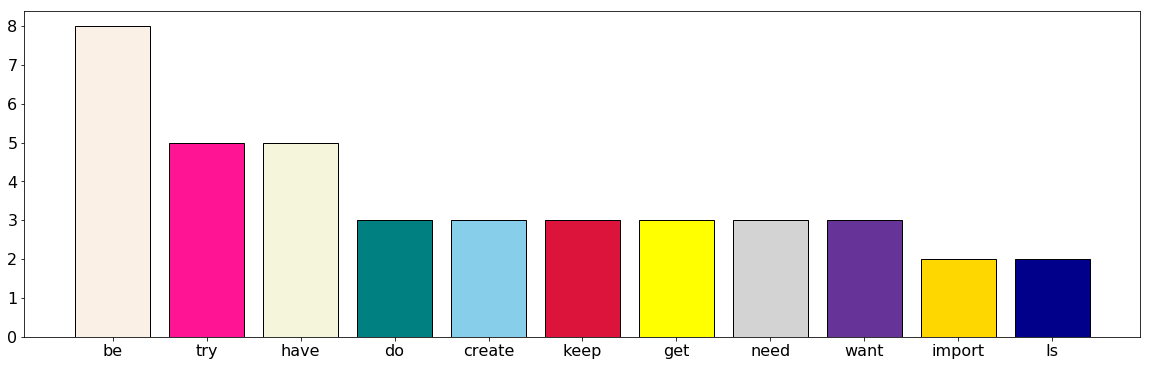

In [20]:
# Plot the "action" words
#
plot_words( "Actions", ordered_common_actions )

In [21]:
# Count the extracted keywords
#
all_keywords = {}
for entry in results_list:
    keywords = entry["keywords"]
    for keyword in keywords:
        if( keyword not in all_keywords ):
            all_keywords[keyword] = 0
        all_keywords[keyword] += 1

common_keywords = dict( [ (k,v) for k,v in all_keywords.items() if v > 2 ] )

ordered_common_keywords = OrderedDict( sorted( common_keywords.items(), key=lambda x:x[1], reverse=True ) )
ordered_common_keywords

OrderedDict([('error', 10),
             ('notebook', 8),
             ('data', 8),
             ('Im', 7),
             ('project', 5),
             ('trouble', 4),
             ('help', 4),
             ('model', 4),
             ('csv file', 3),
             ('connection', 3)])

Keywords


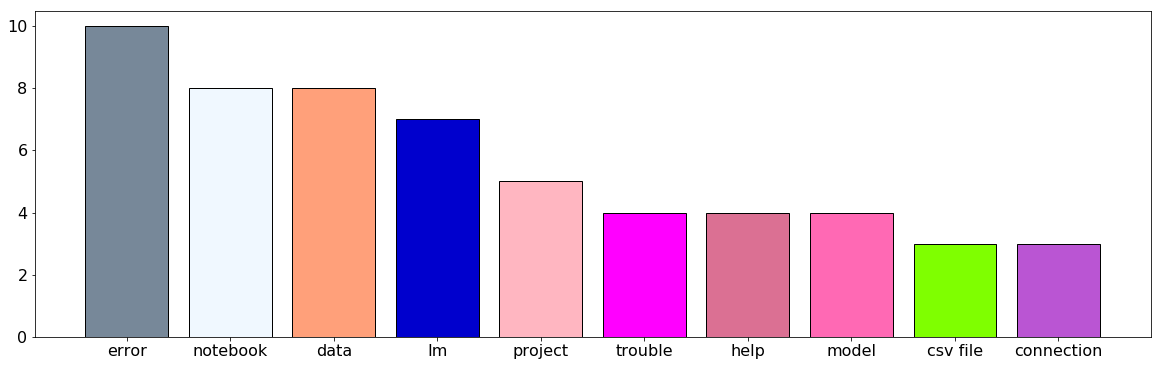

In [22]:
# Plot the keywords
#
plot_words( "Keywords", ordered_common_keywords )

### 6.2 Word clouds showing common words

In [45]:
# Define a helper function for plotting the word clouds
#
def wordcloud_plot( details_arr ):
    num_wordclouds = len( details_arr )
    fig, axs = plt.subplots( 1, num_wordclouds, figsize=( num_wordclouds*10, 10 ) )
    if( num_wordclouds < 2 ):
        axs.imshow( details_arr[0]["wordcloud"] )
        axs.set_title( details_arr[0]["title"], fontsize=20 )
        axs.axis( "off" )
        print( "Word cloud" )
    else:
        for i in range( num_wordclouds ):
            axs[i].imshow( details_arr[i]["wordcloud"] )
            axs[i].set_title( details_arr[i]["title"], fontsize=20 )
            axs[i].axis( "off" )
        print( "Word clouds" )

In [32]:
action_str   = ""
object_str   = ""
for result in results_list:
    action_str  += result["action"] + " "
    object_str  += result["object"] + " "

In [33]:
action_str

'help to place do  try download use to start create be  create keep have try keep create be be have import add be try to Import be try to request create get have need need need want want want be like  have  be to create be have  import change recover upload have be try extend do save start use to acess csv  to upload be be cant see deploy get get keep say try Is Is connect  do insert try '

In [34]:
from wordcloud import WordCloud
wordcloud_action_default = WordCloud().generate( action_str )

Word cloud


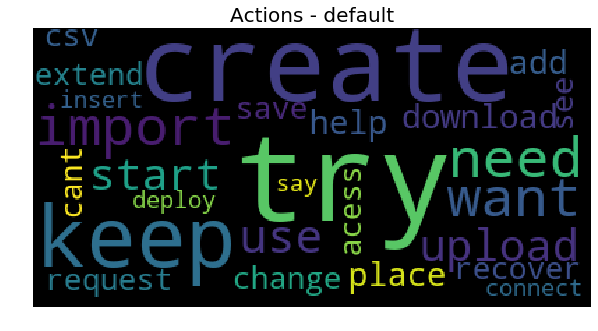

In [46]:
wordcloud_plot( [ { "title" : "Actions - default", "wordcloud" : wordcloud_action_default } ] )

In [60]:
my_stopwords = { "cant", "keep", "help", "try", "say", "use", "need", "want" }

In [61]:
from wordcloud import STOPWORDS
wordcloud_action_manual = WordCloud( stopwords=STOPWORDS.union( my_stopwords ) ).generate( action_str )

Word clouds


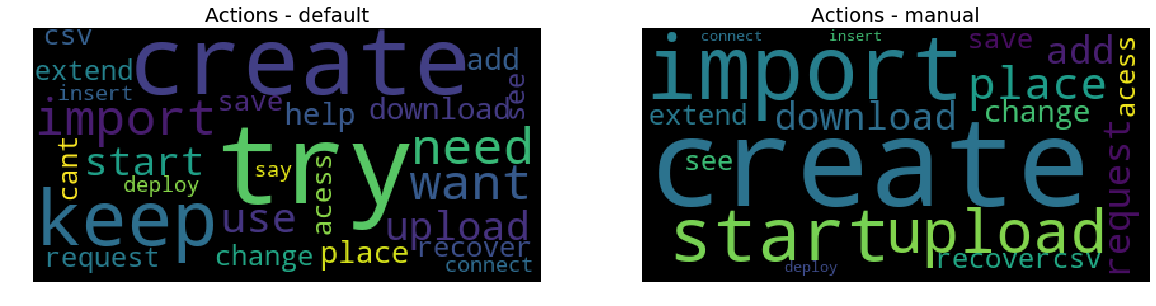

In [62]:
wordcloud_plot( [ { "title" : "Actions - default", "wordcloud" : wordcloud_action_default }, 
                  { "title" : "Actions - manual",  "wordcloud" : wordcloud_action_manual  } ] )

In [49]:
wordcloud_objects = WordCloud().generate( object_str )

Word clouds


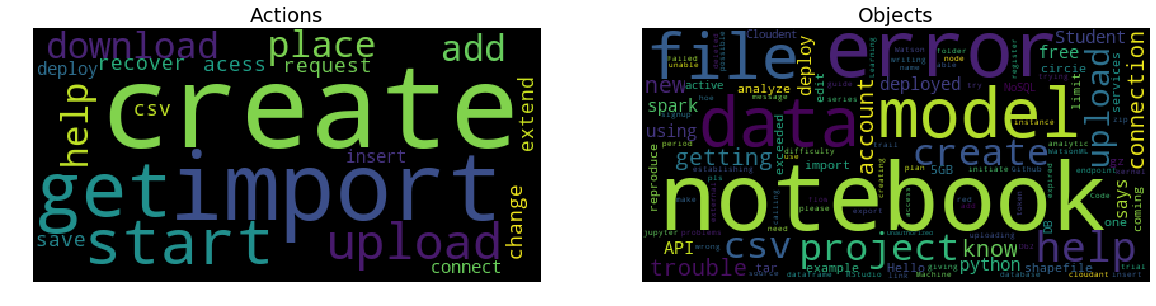

In [50]:
wordcloud_plot( [ { "title" : "Actions", "wordcloud" : wordcloud_action_manual }, 
                  { "title" : "Objects", "wordcloud" : wordcloud_objects       } ] )

Copyright © 2019 IBM. This notebook and its source code are released under the terms of the MIT License.